<a href="https://colab.research.google.com/github/SakshatVacche/CodSoft/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (3).zip to archive (3) (1).zip


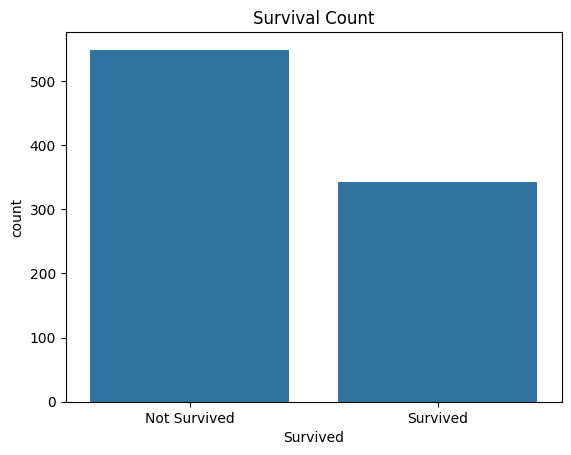

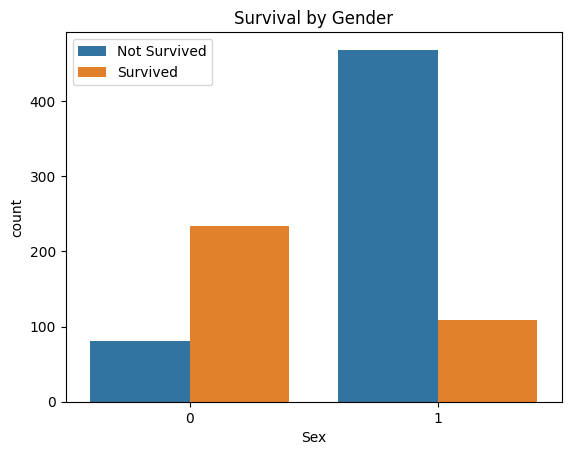

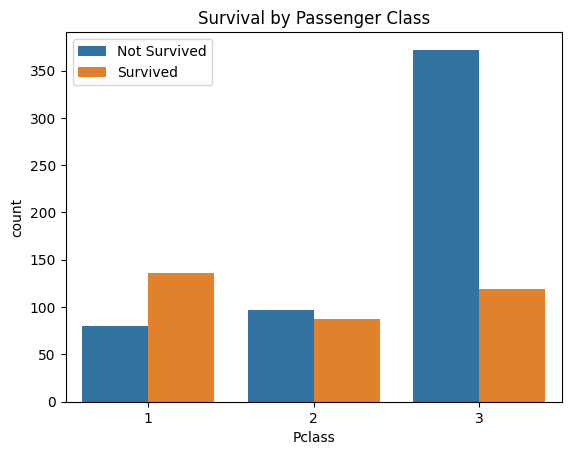

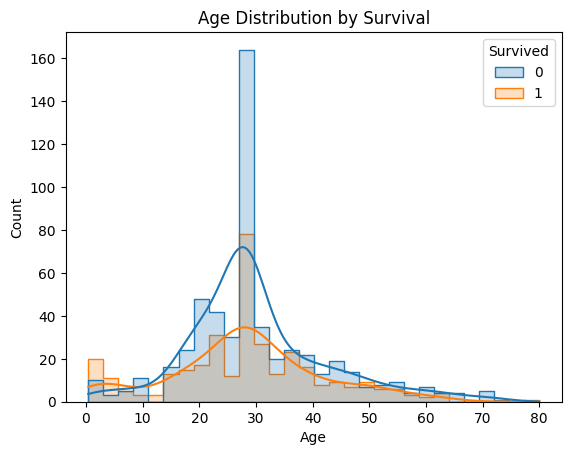

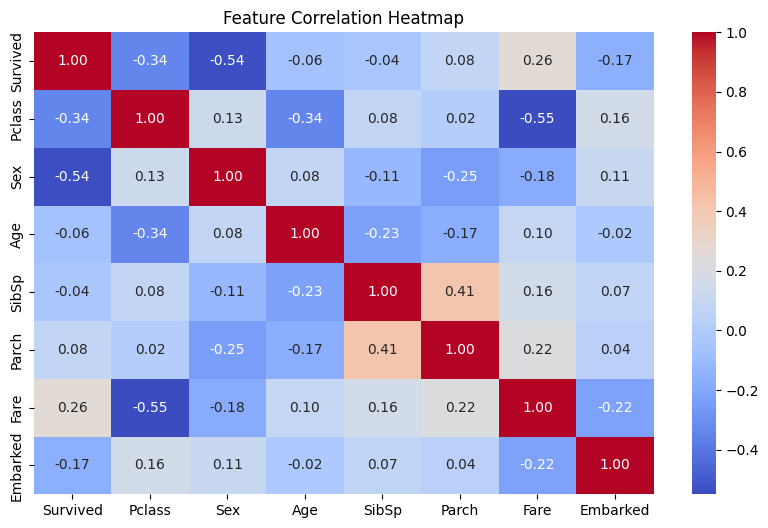

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
import zipfile, io, glob, os

# Upload and extract ZIP
uploaded = files.upload()
z = zipfile.ZipFile(io.BytesIO(uploaded[next(iter(uploaded))]), 'r')
z.extractall("data")
f = glob.glob("data/**/*.csv", recursive=True)[0]

# Load and clean data
df = pd.read_csv(f)
df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')
df.fillna({'Age': df['Age'].median(), 'Embarked': df['Embarked'].mode()[0]}, inplace=True)

# Encode categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Data visualization
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.legend(labels=["Not Survived", "Survived"])
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.legend(labels=["Not Survived", "Survived"])
plt.show()

sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, element="step")
plt.title("Age Distribution by Survival")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Split data and train model
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
